<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

In [ ]:
#pip install pandas-datareader


In [ ]:
#!pip install pystan fbprophet


# PROPHET MODEL

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

To start working with prophet, we were testing using few dataset, however the price of crypto currency can change very easily it was decided to use Yahoo finance, meaning that everytime we run the code we will get the must updated amount of crytocurrency.


In [ ]:
data_btc = pdr.get_data_yahoo('BTC-USD')
data_et = pdr.get_data_yahoo('ETH-USD')


In [ ]:
data_btc.head(1000)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-12,1856.150024,1694.010010,1845.760010,1724.239990,740984000,1724.239990
2017-05-13,1812.989990,1651.079956,1723.119995,1804.910034,579635008,1804.910034
2017-05-14,1831.420044,1776.619995,1800.859985,1808.910034,437196000,1808.910034
2017-05-15,1812.800049,1708.540039,1808.439941,1738.430054,731529024,1738.430054
2017-05-16,1785.939941,1686.540039,1741.699951,1734.449951,959044992,1734.449951
...,...,...,...,...,...,...
2020-02-01,9439.323242,9313.239258,9346.357422,9392.875000,25922656496,9392.875000
2020-02-02,9468.797852,9217.824219,9389.820312,9344.365234,30835736946,9344.365234
2020-02-03,9540.372070,9248.633789,9344.683594,9293.521484,30934096509,9293.521484


In [ ]:
data_et.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003


The next few steps it will be perform EDA, to understand and clean the data if needed

In [ ]:
data_btc.info

<bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2017-05-12   1856.150024   1694.010010   1845.760010   1724.239990   
2017-05-13   1812.989990   1651.079956   1723.119995   1804.910034   
2017-05-14   1831.420044   1776.619995   1800.859985   1808.910034   
2017-05-15   1812.800049   1708.540039   1808.439941   1738.430054   
2017-05-16   1785.939941   1686.540039   1741.699951   1734.449951   
...                  ...           ...           ...           ...   
2022-05-07  36129.925781  34940.824219  36042.503906  35501.953125   
2022-05-08  35502.941406  33878.964844  35502.941406  34059.265625   
2022-05-09  34222.074219  30296.953125  34060.015625  30296.953125   
2022-05-10  32596.308594  29944.802734  30273.654297  31022.906250   
2022-05-11  31988.117188  29104.048828  30985.792969  29235.087891   

                 Volume     Adj Close  
Date             

In [ ]:
data_et.info

<bound method DataFrame.info of                    High          Low         Open        Close       Volume  \
Date                                                                          
2017-11-09   329.451996   307.056000   308.644989   320.884003    893249984   
2017-11-10   324.717987   294.541992   320.670990   299.252991    885985984   
2017-11-11   319.453003   298.191986   298.585999   314.681000    842300992   
2017-11-12   319.153015   298.513000   314.690002   307.907990   1613479936   
2017-11-13   328.415009   307.024994   307.024994   316.716003   1041889984   
...                 ...          ...          ...          ...          ...   
2022-05-07  2696.652832  2599.523438  2694.991943  2636.093018  13369276367   
2022-05-08  2638.830566  2498.430176  2636.121826  2517.459961  20802269935   
2022-05-09  2528.258057  2238.062744  2518.508301  2245.430420  36333567678   
2022-05-10  2450.760254  2206.756836  2242.650391  2343.510986  38202099639   
2022-05-11  2439.799

In [ ]:
data_btc.duplicated().sum()


0

In [ ]:
data_et.duplicated().sum()

0

In [ ]:
data_btc.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
data_et.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

To check if there is a possible outlier it was checked by running a loop loading a boxplot for each column, notice that the ethereum has data that it out of the boxplot quartile, however, that is not outliers, but a spike in the value of the currency.

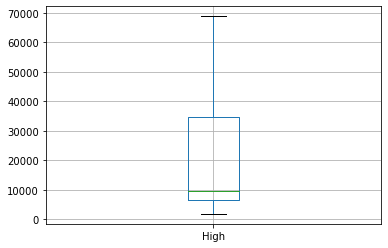

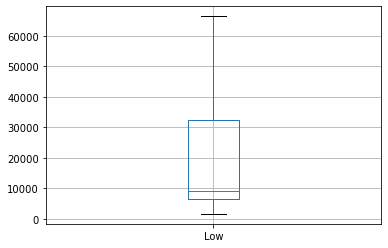

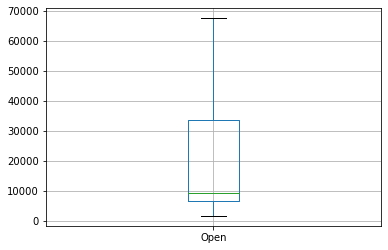

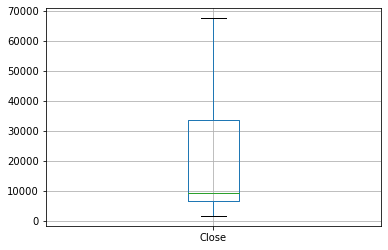

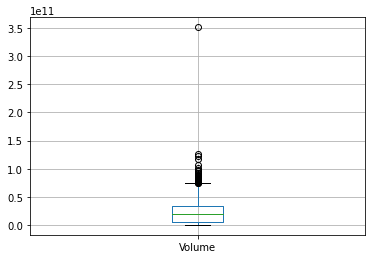

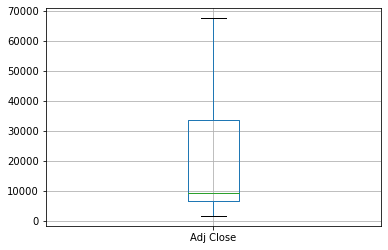

In [ ]:
for column in data_btc:
    plt.figure()
    data_btc.boxplot([column])

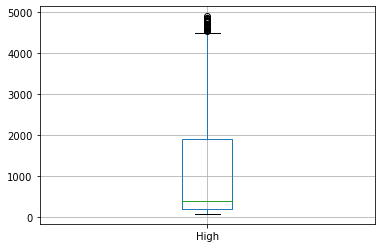

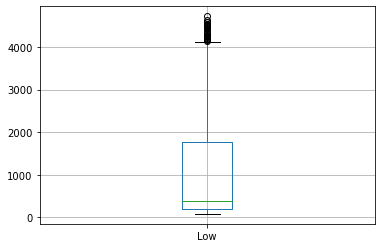

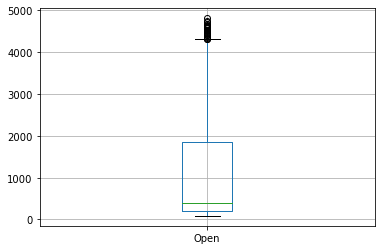

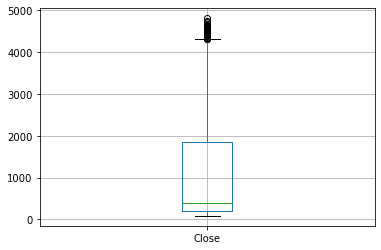

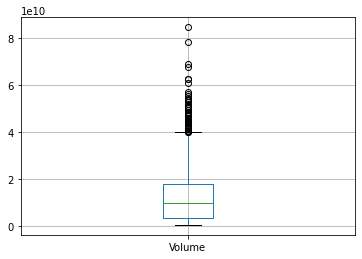

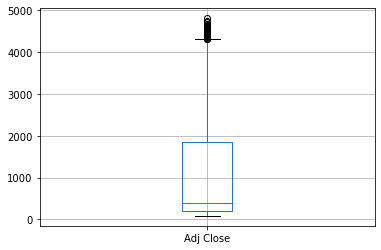

In [ ]:
for column in data_et:
    plt.figure()
    data_et.boxplot([column])

As the Prophet will use the date and the close column to perform the prediction, the data could not be used as Index, as we load the data the index is the date, to fix this it was used reset_index method.

In [ ]:
data_btc=data_btc.reset_index()

In [ ]:
data_et=data_et.reset_index()

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   High       1826 non-null   float64       
 2   Low        1826 non-null   float64       
 3   Open       1826 non-null   float64       
 4   Close      1826 non-null   float64       
 5   Volume     1826 non-null   int64         
 6   Adj Close  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


The only columns that will be needed are the Date and closing, closing because is the final amount of the day

In [ ]:
data_btc.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_et.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_btc.tail()

,Date,Close
1821,2022-05-07,35501.953125
1822,2022-05-08,34059.265625
1823,2022-05-09,30296.953125
1824,2022-05-10,31022.906250
1825,2022-05-11,29235.087891


In [ ]:
data_et.tail()

,Date,Close
1640,2022-05-07,2636.093018
1641,2022-05-08,2517.459961
1642,2022-05-09,2245.430420
1643,2022-05-10,2343.510986
1644,2022-05-11,2114.933105


Prophet model uses standards labels, such as DS for datastamp and Y for the numeric column, both columns need to be on the right format to be perfomed by prophet model


In [ ]:
data_btc.columns = ['ds','y']

In [ ]:
data_et.columns = ['ds','y']

The next plots are displaying the closing amount throught time for both currencies 

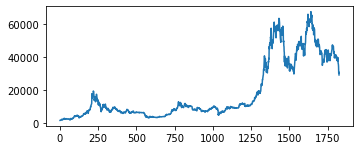

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_btc['y'].plot(ax = ax)

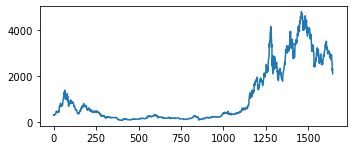

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_et['y'].plot(ax = ax)

In [ ]:
data_btc.tail()

,ds,y
1821,2022-05-07,35501.953125
1822,2022-05-08,34059.265625
1823,2022-05-09,30296.953125
1824,2022-05-10,31022.906250
1825,2022-05-11,29235.087891


In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1826 non-null   datetime64[ns]
 1   y       1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


To fit the model given, we firstly instantiate a new prophet object

Prophet automatically detects changes in trends by selecting changepoints from the data 

interval_width=0.95’ is the uncertainty interval to produce a confidence interval around the forecast.

the change point will make the model more flexible to fit the data points

we are aiming to see if the model is able to catch historical data well, after some changes in the parameters it was possible to increase on fitting the data.

y(t) = g(t) + s(t) + h(t) + e(t)
g(t)- trends for example the growth of bitcoin/ethereum over time
s(t) - seasonality, in this case it was used yearly and monthly
h(t) - holidays - this is not used as there is no effect on cryto
e(t) - can be declared as the noise

This is the formula used in prophet
however there is no much seasonality in our dataset on monthly and yearly for the last 2 years it started indicating an inicial seasonality.


In [ ]:
model_btc= Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2)
model_btc.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
md = model_btc.fit(data_btc)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m_et = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2)
m_et.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
model_et = m_et.fit(data_et)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The make future and predict method creates a data frame that will return a prediction with the number of days that are inserted inside the parameters periods, and set to use the frequence as Day. this prediction will give results such, trends,lowest and highest for the closing

In [ ]:
future_btc = md.make_future_dataframe(periods=50,freq='D')
forecast = md.predict(future_btc)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-26,36187.385843,-1894.361776,44722.379703,12432.477201,57431.598002,-14071.144707,-14071.144707,-14071.144707,-404.880320,...,-12.809845,-12.809845,-12.809845,-13653.454542,-13653.454542,-13653.454542,0.0,0.0,0.0,22116.241136
1872,2022-06-27,36149.808936,-3072.209310,44536.905276,11707.449452,58191.259182,-14131.776978,-14131.776978,-14131.776978,-395.801429,...,10.290224,10.290224,10.290224,-13746.265774,-13746.265774,-13746.265774,0.0,0.0,0.0,22018.031958
1873,2022-06-28,36112.232029,-3186.007493,45540.533999,10982.421704,58818.415655,-14230.917539,-14230.917539,-14230.917539,-377.579863,...,-18.006754,-18.006754,-18.006754,-13835.330921,-13835.330921,-13835.330921,0.0,0.0,0.0,21881.314491
1874,2022-06-29,36074.655122,-3966.546152,47074.309876,10311.779511,59510.877082,-14213.456475,-14213.456475,-14213.456475,-336.472690,...,42.194808,42.194808,42.194808,-13919.178593,-13919.178593,-13919.178593,0.0,0.0,0.0,21861.198647
1875,2022-06-30,36037.078215,-4805.223366,47363.534743,9526.350453,60441.371011,-14271.798251,-14271.798251,-14271.798251,-250.050418,...,-25.404205,-25.404205,-25.404205,-13996.343628,-13996.343628,-13996.343628,0.0,0.0,0.0,21765.279965


In [ ]:
future_et = m_et.make_future_dataframe(periods=50, freq='D')
forecast_et = m_et.predict(future_et)
forecast_et.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1675,2022-06-11,3418.980582,2257.463933,3500.233139,2931.290529,3925.925115,-560.990350,-560.990350,-560.990350,14.370575,...,-0.319168,-0.319168,-0.319168,-575.041757,-575.041757,-575.041757,0.0,0.0,0.0,2857.990232
1676,2022-06-12,3420.264446,2269.665049,3487.574517,2898.216108,3950.815042,-563.063715,-563.063715,-563.063715,13.203570,...,0.574948,0.574948,0.574948,-576.842232,-576.842232,-576.842232,0.0,0.0,0.0,2857.200732
1677,2022-06-13,3421.548311,2252.575920,3517.928163,2876.608646,3978.699194,-559.668521,-559.668521,-559.668521,19.669073,...,-1.063511,-1.063511,-1.063511,-578.274083,-578.274083,-578.274083,0.0,0.0,0.0,2861.879790
1678,2022-06-14,3422.832175,2289.963853,3573.908896,2840.037478,4006.479071,-549.068543,-549.068543,-549.068543,30.239649,...,0.144517,0.144517,0.144517,-579.452709,-579.452709,-579.452709,0.0,0.0,0.0,2873.763633
1679,2022-06-15,3424.116040,2249.787947,3583.711688,2811.402435,4037.363387,-538.276550,-538.276550,-538.276550,38.379276,...,3.835293,3.835293,3.835293,-580.491119,-580.491119,-580.491119,0.0,0.0,0.0,2885.839491
1680,2022-06-16,3425.399905,2166.814098,3605.451134,2782.172332,4062.381177,-541.395444,-541.395444,-541.395444,39.175742,...,0.925963,0.925963,0.925963,-581.497149,-581.497149,-581.497149,0.0,0.0,0.0,2884.004461
1681,2022-06-17,3426.683769,2141.307273,3629.090449,2761.182509,4090.468419,-554.500887,-554.500887,-554.500887,32.168058,...,-4.098042,-4.098042,-4.098042,-582.570903,-582.570903,-582.570903,0.0,0.0,0.0,2872.182882
1682,2022-06-18,3427.967634,2110.314168,3676.143276,2740.192686,4118.555661,-563.662911,-563.662911,-563.662911,20.458725,...,-0.319168,-0.319168,-0.319168,-583.802468,-583.802468,-583.802468,0.0,0.0,0.0,2864.304723
1683,2022-06-19,3429.251498,2093.979304,3641.065957,2718.232267,4146.642903,-577.087846,-577.087846,-577.087846,7.607136,...,0.574948,0.574948,0.574948,-585.269930,-585.269930,-585.269930,0.0,0.0,0.0,2852.163653
1684,2022-06-20,3430.535363,1990.089288,3672.379497,2692.926960,4192.623992,-592.695358,-592.695358,-592.695358,-4.594083,...,-1.063511,-1.063511,-1.063511,-587.037764,-587.037764,-587.037764,0.0,0.0,0.0,2837.840005


In [ ]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1856,2022-06-11,36751.039449,10917.897308,37284.535637,24072.836408,48656.015683,-12099.307203,-12099.307203,-12099.307203,355.507107,...,12.957666,12.957666,12.957666,-12467.771976,-12467.771976,-12467.771976,0.0,0.0,0.0,24651.732245
1857,2022-06-12,36713.462542,11517.233661,39377.139248,23347.316841,49114.019002,-12230.532131,-12230.532131,-12230.532131,311.311396,...,-12.809845,-12.809845,-12.809845,-12529.033682,-12529.033682,-12529.033682,0.0,0.0,0.0,24482.930411
1858,2022-06-13,36675.885635,8877.201119,37630.160647,22589.943430,49850.969092,-12293.148964,-12293.148964,-12293.148964,286.352108,...,10.290224,10.290224,10.290224,-12589.791296,-12589.791296,-12589.791296,0.0,0.0,0.0,24382.736671
1859,2022-06-14,36638.308728,9824.847854,38902.695040,21890.062720,50449.971572,-12384.620754,-12384.620754,-12384.620754,284.905465,...,-18.006754,-18.006754,-18.006754,-12651.519465,-12651.519465,-12651.519465,0.0,0.0,0.0,24253.687974
1860,2022-06-15,36600.731821,7713.365028,38431.871601,21006.083860,50919.844832,-12395.769846,-12395.769846,-12395.769846,277.489375,...,42.194808,42.194808,42.194808,-12715.454028,-12715.454028,-12715.454028,0.0,0.0,0.0,24204.961975
1861,2022-06-16,36563.154914,8129.337733,39884.506241,19812.920934,51645.238755,-12570.629602,-12570.629602,-12570.629602,237.347234,...,-25.404205,-25.404205,-25.404205,-12782.572632,-12782.572632,-12782.572632,0.0,0.0,0.0,23992.525311
1862,2022-06-17,36525.578007,7168.409787,40745.174798,18985.370269,52251.056390,-12693.956825,-12693.956825,-12693.956825,168.847145,...,-9.221894,-9.221894,-9.221894,-12853.582076,-12853.582076,-12853.582076,0.0,0.0,0.0,23831.621182
1863,2022-06-18,36488.001100,5860.156031,40107.729189,18253.889724,52852.072645,-12815.138463,-12815.138463,-12815.138463,100.816312,...,12.957666,12.957666,12.957666,-12928.912441,-12928.912441,-12928.912441,0.0,0.0,0.0,23672.862636
1864,2022-06-19,36450.424193,4233.938479,40811.173497,17470.168419,53437.823693,-12967.128100,-12967.128100,-12967.128100,54.399603,...,-12.809845,-12.809845,-12.809845,-13008.717858,-13008.717858,-13008.717858,0.0,0.0,0.0,23483.296093
1865,2022-06-20,36412.847285,3964.419353,41250.373857,16586.189559,53653.684831,-13062.677626,-13062.677626,-13062.677626,19.915757,...,10.290224,10.290224,10.290224,-13092.883607,-13092.883607,-13092.883607,0.0,0.0,0.0,23350.169660


For the main purpose of the prediction only the columns ds - dataStamp and Yhat - the numerical value of the trained data followed by the prediction

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-05-12,5757.508594
1,2017-05-13,5428.897095
2,2017-05-14,5027.569887
3,2017-05-15,4682.579895
4,2017-05-16,4303.506011
...,...,...
1871,2022-06-26,22116.241136
1872,2022-06-27,22018.031958
1873,2022-06-28,21881.314491
1874,2022-06-29,21861.198647


In [ ]:
forecast_et[['ds','yhat']]

,ds,yhat
0,2017-11-09,84.831269
1,2017-11-10,132.762612
2,2017-11-11,182.037568
3,2017-11-12,218.114390
4,2017-11-13,242.956212
...,...,...
1690,2022-06-26,2794.452727
1691,2022-06-27,2785.990792
1692,2022-06-28,2779.421081
1693,2022-06-29,2779.106374


to check the accuracy of our predictions it was used r2 score, the best possible score is 1.0 however, too high might mean that the data is overfitting

### Bitcoin R_2 score

to check the accuracy of our predictions it was used r2 score, the best possible score is 1.0 however, too high might mean that the data is overfitting


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
train_btc = data_btc[:int(0.85 * (len(data_btc)))]
test_btc  = data_btc[int(0.85 * (len(data_btc))):]

train_btc.shape, test_btc.shape

((1552, 2), (274, 2))

In [ ]:
future_btc = md.make_future_dataframe(periods=1, freq='D')
forecast_btc = md.predict(future_btc)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-26,36187.385843,-1894.361776,44722.379703,12432.477201,57431.598002,-14071.144707,-14071.144707,-14071.144707,-404.880320,...,-12.809845,-12.809845,-12.809845,-13653.454542,-13653.454542,-13653.454542,0.0,0.0,0.0,22116.241136
1872,2022-06-27,36149.808936,-3072.209310,44536.905276,11707.449452,58191.259182,-14131.776978,-14131.776978,-14131.776978,-395.801429,...,10.290224,10.290224,10.290224,-13746.265774,-13746.265774,-13746.265774,0.0,0.0,0.0,22018.031958
1873,2022-06-28,36112.232029,-3186.007493,45540.533999,10982.421704,58818.415655,-14230.917539,-14230.917539,-14230.917539,-377.579863,...,-18.006754,-18.006754,-18.006754,-13835.330921,-13835.330921,-13835.330921,0.0,0.0,0.0,21881.314491
1874,2022-06-29,36074.655122,-3966.546152,47074.309876,10311.779511,59510.877082,-14213.456475,-14213.456475,-14213.456475,-336.472690,...,42.194808,42.194808,42.194808,-13919.178593,-13919.178593,-13919.178593,0.0,0.0,0.0,21861.198647
1875,2022-06-30,36037.078215,-4805.223366,47363.534743,9526.350453,60441.371011,-14271.798251,-14271.798251,-14271.798251,-250.050418,...,-25.404205,-25.404205,-25.404205,-13996.343628,-13996.343628,-13996.343628,0.0,0.0,0.0,21765.279965


In [ ]:
evaluation_results = pd.DataFrame({'r2_score_bitcoin': r2_score(test_btc['y'], forecast_btc['yhat'][1553:])}, index = [0])
evaluation_results

,r2_score_bitcoin
0,0.841398


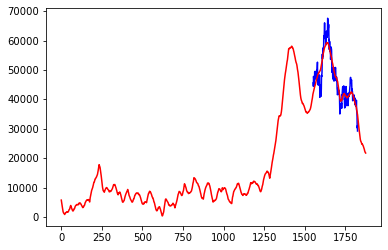

In [ ]:

test_btc['y'].plot(color='b', linestyle = '-')
forecast['yhat'].plot(color='r', linestyle = '-')

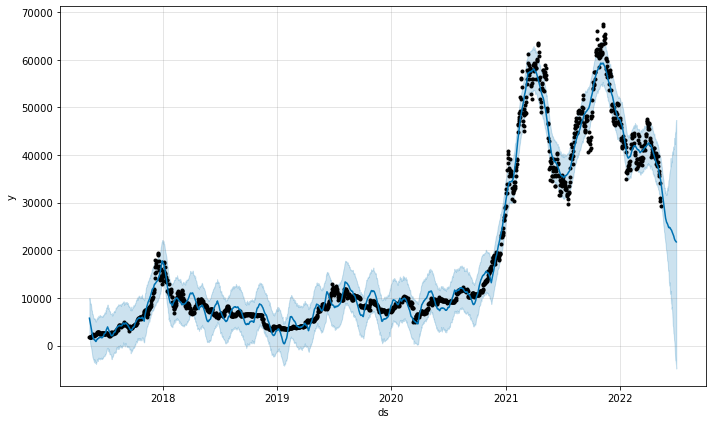

In [ ]:
plot = md.plot(forecast)

### Ethereum r_2 score

In [ ]:
train_et = data_et[:int(0.85 * (len(data_et)))]
test_et  = data_et[int(0.85 * (len(data_et))):]


train_et.shape, test_et.shape

((1398, 2), (247, 2))

In [ ]:
future_et = m_et.make_future_dataframe(periods=1, freq='D')
forecast_et = m_et.predict(future_et)
forec = forecast_et[int(0.85 * (len(data_et))):]
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-26,36187.385843,-1894.361776,44722.379703,12432.477201,57431.598002,-14071.144707,-14071.144707,-14071.144707,-404.880320,...,-12.809845,-12.809845,-12.809845,-13653.454542,-13653.454542,-13653.454542,0.0,0.0,0.0,22116.241136
1872,2022-06-27,36149.808936,-3072.209310,44536.905276,11707.449452,58191.259182,-14131.776978,-14131.776978,-14131.776978,-395.801429,...,10.290224,10.290224,10.290224,-13746.265774,-13746.265774,-13746.265774,0.0,0.0,0.0,22018.031958
1873,2022-06-28,36112.232029,-3186.007493,45540.533999,10982.421704,58818.415655,-14230.917539,-14230.917539,-14230.917539,-377.579863,...,-18.006754,-18.006754,-18.006754,-13835.330921,-13835.330921,-13835.330921,0.0,0.0,0.0,21881.314491
1874,2022-06-29,36074.655122,-3966.546152,47074.309876,10311.779511,59510.877082,-14213.456475,-14213.456475,-14213.456475,-336.472690,...,42.194808,42.194808,42.194808,-13919.178593,-13919.178593,-13919.178593,0.0,0.0,0.0,21861.198647
1875,2022-06-30,36037.078215,-4805.223366,47363.534743,9526.350453,60441.371011,-14271.798251,-14271.798251,-14271.798251,-250.050418,...,-25.404205,-25.404205,-25.404205,-13996.343628,-13996.343628,-13996.343628,0.0,0.0,0.0,21765.279965


In [ ]:
fore = forec.iloc[1:, :]
fore

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1399,2021-09-08,3064.633953,2911.522454,3656.267404,3064.633953,3064.633953,229.538666,229.538666,229.538666,24.832244,...,3.835293,3.835293,3.835293,200.871129,200.871129,200.871129,0.0,0.0,0.0,3294.172619
1400,2021-09-09,3065.917818,2921.282269,3666.993170,3065.917818,3065.917818,226.729903,226.729903,226.729903,17.374994,...,0.925963,0.925963,0.925963,208.428946,208.428946,208.428946,0.0,0.0,0.0,3292.647720
1401,2021-09-10,3067.201682,2911.294942,3650.634341,3067.201682,3067.201682,224.400953,224.400953,224.400953,12.829431,...,-4.098042,-4.098042,-4.098042,215.669564,215.669564,215.669564,0.0,0.0,0.0,3291.602635
1402,2021-09-11,3068.485547,2930.454857,3666.494390,3068.485547,3068.485547,237.940046,237.940046,237.940046,15.582812,...,-0.319168,-0.319168,-0.319168,222.676402,222.676402,222.676402,0.0,0.0,0.0,3306.425592
1403,2021-09-12,3069.769412,2926.499574,3712.763507,3069.769412,3069.769412,254.943642,254.943642,254.943642,24.833214,...,0.574948,0.574948,0.574948,229.535480,229.535480,229.535480,0.0,0.0,0.0,3324.713053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,2022-05-08,3375.329185,2752.077616,3490.208079,3375.329185,3375.329185,-256.027979,-256.027979,-256.027979,28.343171,...,0.574948,0.574948,0.574948,-284.946098,-284.946098,-284.946098,0.0,0.0,0.0,3119.301207
1642,2022-05-09,3376.613050,2726.385733,3495.148597,3376.613050,3376.613050,-252.758454,-252.758454,-252.758454,29.358364,...,-1.063511,-1.063511,-1.063511,-281.053306,-281.053306,-281.053306,0.0,0.0,0.0,3123.854596
1643,2022-05-10,3377.896915,2743.853613,3484.524375,3377.896915,3377.896915,-253.858999,-253.858999,-253.858999,24.832244,...,0.144517,0.144517,0.144517,-278.835759,-278.835759,-278.835759,0.0,0.0,0.0,3124.037916
1644,2022-05-11,3379.180779,2761.132260,3531.935425,3379.180779,3379.180779,-257.140885,-257.140885,-257.140885,17.374994,...,3.835293,3.835293,3.835293,-278.351172,-278.351172,-278.351172,0.0,0.0,0.0,3122.039894


In [ ]:
evaluation_results_et = pd.DataFrame({'r2_score_ethereum': r2_score(test_et['y'], fore['yhat'])}, index = [0])
evaluation_results_et


,r2_score_ethereum
0,0.792865


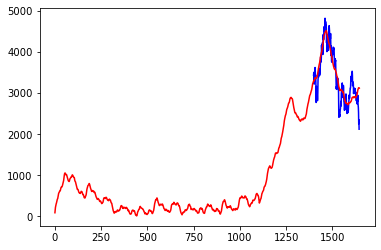

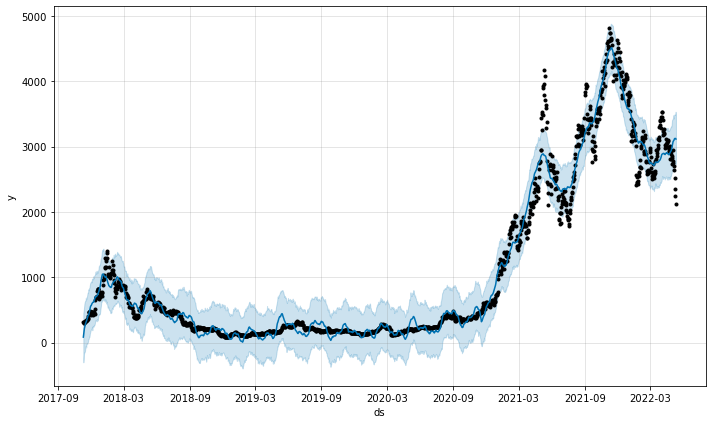

In [ ]:
test_et['y'].plot(color='b', linestyle = '-')
forecast_et['yhat'].plot(color='r', linestyle = '-')
plot =m_et.plot(forecast_et)

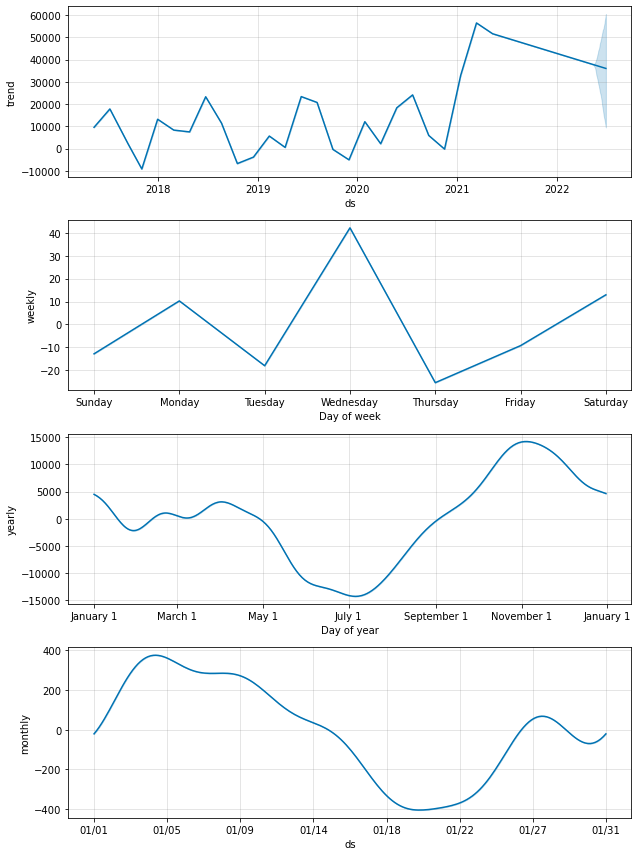

In [ ]:
plot2 = md.plot_components(forecast)

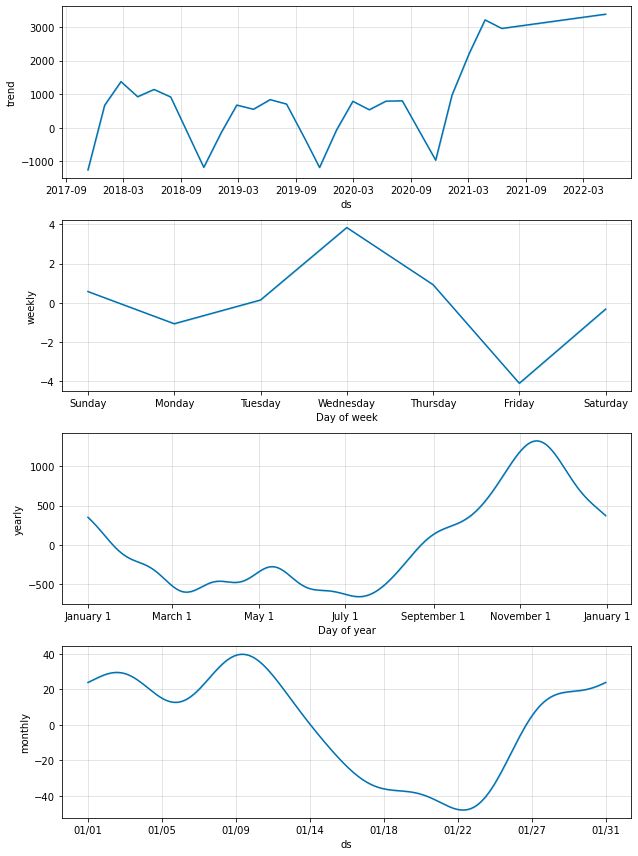

In [ ]:
plot2 = m_et.plot_components(forecast_et)

---
# **Exponential Smoothing Model Applied to Bitcoin**

---


### Imports

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

In [ ]:
#pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
import pandas as pd

---
Importing the ExponentialSmoothing algorithm from statsmodels package

In [ ]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

---
Through the pandas_datareader, let's get access to the Yahoo Finance.
This line of code will get the data from 2020 afterwards.

In [ ]:
df = pdr.get_data_yahoo('BTC-USD')

### Preparing the Data

---
Now, it is time to drop a few columns of the dataset and keep the Close column, in order to proceeding with our implementation

In [ ]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

---
Transforming the index in a Date column

In [ ]:
df=df.reset_index()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Date,Close
1821,2022-05-07,35501.953125
1822,2022-05-08,34059.265625
1823,2022-05-09,30296.953125
1824,2022-05-10,31022.906250
1825,2022-05-11,29160.539062


---

### Prediction


The following code will train, and fit the model, proceeding with and forecast of the desired amount of days - HORIZON, on this case -.

---

In [ ]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1826,29210.29006,989.021738,27942.807704,30477.772417
1827,29210.29006,1379.964432,27441.794482,30978.785639
1828,29210.29006,1682.391057,27054.219167,31366.360954
1829,29210.29006,1938.189234,26726.400614,31694.179507
1830,29210.29006,2163.958258,26437.065967,31983.514154


---
The summary_frame above displays the mean, which on this case is the value predicted, and the confidence interval which is the lower and the upper columns on the very right hand side of the frame.

Note that the Exponential Smoothing prediction of the following 10 steps of the dataset have the same value. What will influency our prediction graph into a straith line.
It is due to the fact that the Exponential Smoothing formula requires the previous value of the dataset to predict the next value, and as our dataset has an ending, the formula will predict only one step ahead.

It does not mean that our prediction is wrong, just shows us that the Simple Exponential Smoothing Statistical prediction has also some sort of limitations. On the other hand, the precition has an upper and a lower bounder, which statistically places our prediction in a range of possible values.

The alternative for this, in case the business case requires more than one step ahead prediction, is to use the Multi-Step Forecasting methods. Not included in this project as our business case does not require it.


---

In [ ]:
print(results.forecast(steps=1))

1826    29210.29006
dtype: float64


The print above was done to explore the structure of the returned data from the forecast() function. This line of code is relevant and massively important for our Decision-making feature.

---

### Visualization

---

The plot below displays the predicted values + the confidence interval generated in this model implementation.
For the sake of a better visualization, it was scaled for the last 25 observations.

---

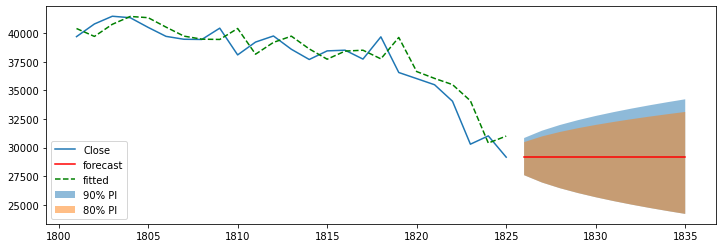

In [ ]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

### Evaluation

Statistical model

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                   ETS(A, N, N)   Log Likelihood              -15184.386
Date:                Wed, 11 May 2022   AIC                          30374.771
Time:                        21:50:00   BIC                          30391.301
Sample:                             0   HQIC                         30380.869
                               - 1826   Scale                       978163.998
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9730      0.015     65.677      0.000       0.944       1.002
initial_level    1724.2400   4.48e+05      0.004      0.997   -8.76e+05     8.8e+05
===================================================================================
Ljung-Box (Q):                      140.57   Jarque-Bera (JB):              8326.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Model residuals

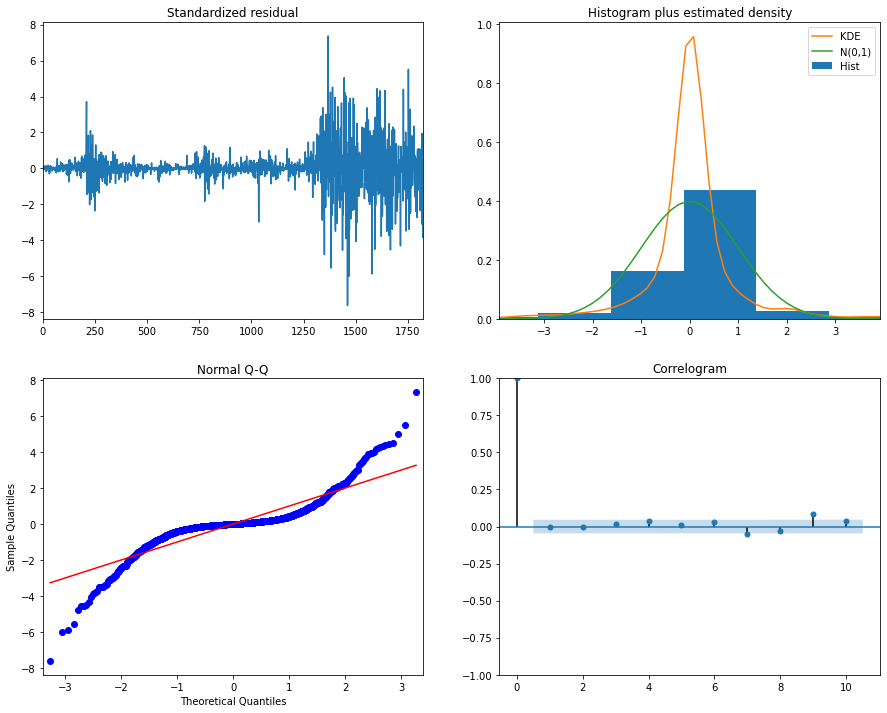

In [ ]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [ ]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((1552, 2), (274, 2))

In [ ]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

1552    45604.216096
1553    45593.921908
1554    44459.711174
1555    47703.455790
1556    47113.295092
            ...     
1821    36057.554739
1822    35516.930548
1823    34098.560082
1824    30399.433523
1825    31006.099217
Name: Simple Exponential Smoothing Predictions, Length: 274, dtype: float64


In [ ]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.960352


**The evaluation of our r2_score and residuals brings us a pretty good accurancy without overfitting.**

---

---

# Exponential Smoothing Model applied to ETHERIUM

To proceed with this implementation we will follow the same steps as the bitcoin implementation

---

In [ ]:
df_eth = pdr.get_data_yahoo('ETH-USD')

In [ ]:
df_eth.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df_eth=df_eth.reset_index()

In [ ]:
df_eth["Date"] = pd.to_datetime(df_eth["Date"])
df.tail()

,Date,Close
1821,2022-05-07,35501.953125
1822,2022-05-08,34059.265625
1823,2022-05-09,30296.953125
1824,2022-05-10,31022.906250
1825,2022-05-11,29160.539062


In [ ]:
df_eth.head(10000)

,Date,Close
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003
...,...,...
1640,2022-05-07,2636.093018
1641,2022-05-08,2517.459961
1642,2022-05-09,2245.430420
1643,2022-05-10,2343.510986


In [ ]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [ ]:
HORIZON = 10

model_eth = ExponentialSmoothing(endog = df_eth['Close'])
results_eth = model_eth.fit()

preds_eth = results_eth.get_forecast(steps=HORIZON)

preds_eth.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1645,2129.141889,80.005081,2026.611253,2231.672526
1646,2129.141889,109.364382,1988.985794,2269.297984
1647,2129.141889,132.364358,1959.510139,2298.773639
1648,2129.141889,151.921290,1934.446922,2323.836856
1649,2129.141889,169.233074,1912.260978,2346.022801


In [ ]:
preds_eth.summary_frame(alpha=0.2).head(10)

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1645,2129.141889,80.005081,2026.611253,2231.672526
1646,2129.141889,109.364382,1988.985794,2269.297984
1647,2129.141889,132.364358,1959.510139,2298.773639
1648,2129.141889,151.921290,1934.446922,2323.836856
1649,2129.141889,169.233074,1912.260978,2346.022801
1650,2129.141889,184.931308,1892.142882,2366.140896
1651,2129.141889,199.397452,1873.603773,2384.680006
1652,2129.141889,212.882829,1856.321566,2401.962212
1653,2129.141889,225.563415,1840.070742,2418.213037
1654,2129.141889,237.568115,1824.686100,2433.597679


---

The plot below displays the predicted values + the confidence interval generated in this model implementation.
For the sake of a better visualization, it was scaled for the last 85 observations.

---

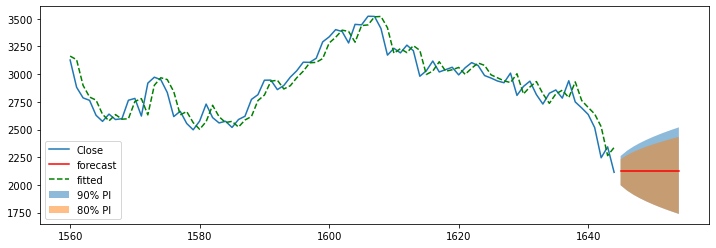

In [ ]:
ax_eth = df_eth['Close'].iloc[-85:].plot(figsize=(12,4))
forecast_80_eth = preds_eth.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90_eth = preds_eth.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax_eth.fill_between(forecast_90_eth.index, forecast_90_eth['mean_ci_lower'], forecast_90_eth['mean_ci_upper'], alpha=0.5, label='90% PI')
ax_eth.fill_between(forecast_80_eth.index, forecast_90_eth['mean_ci_lower'], forecast_80_eth['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80_eth['mean'].iloc[-85:].plot(ax=ax_eth, label='forecast', color='red')

results_eth.fittedvalues.iloc[-85:].plot(ax=ax_eth, label='fitted', color='green', linestyle='--')

ax_eth.legend(loc=3)

In [ ]:
test = forecast_80_eth['mean'].iloc[-85:]

test

1645    2129.141889
1646    2129.141889
1647    2129.141889
1648    2129.141889
1649    2129.141889
1650    2129.141889
1651    2129.141889
1652    2129.141889
1653    2129.141889
1654    2129.141889
Name: mean, dtype: float64

Buy! Real time value is: 28483.83 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28488.73 Predicted value for tomorrow is: 29210.290060450076


In [ ]:
test.head()

0    320.883664
1    320.883980
2    300.724160
3    313.731766
4    308.304077
dtype: float64

results_eth.summary()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

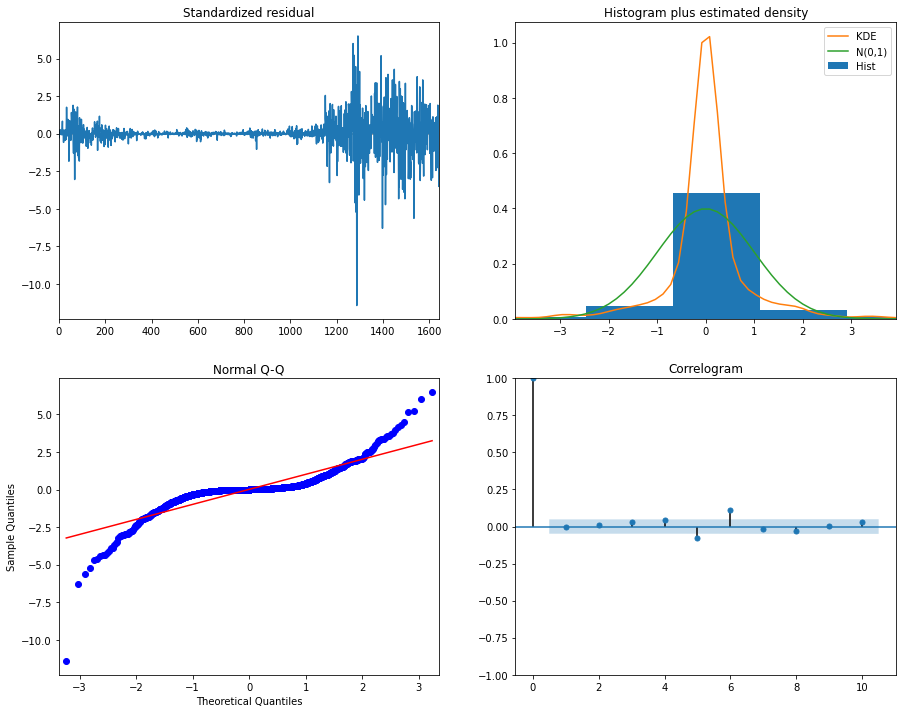

In [ ]:
# Diagnosing the model residuals
results_eth.plot_diagnostics(figsize = (15, 12))
plt.show()

In [ ]:
# Divide into train and validation set to calculate R-squared score
train_eth = df_eth[:int(0.85 * (len(df_eth)))]
test_eth  = df_eth[int(0.85 * (len(df_eth))):]

train_eth.shape, test_eth.shape

((1398, 2), (247, 2))

In [ ]:
start_eth = len(train_eth)
end_eth   = len(train_eth) + len(test_eth) - 1
predictions_eth = results_eth.predict(start = start_eth, end = end_eth, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions_eth)

1398    3929.710939
1399    3460.625918
1400    3494.819871
1401    3431.929531
1402    3226.497340
           ...     
1640    2699.505845
1641    2640.405858
1642    2525.821772
1643    2264.500429
1644    2338.137311
Name: Simple Exponential Smoothing Predictions, Length: 247, dtype: float64


In [ ]:
# Create a dataframe to store r2 score
evaluation_results_eth = pd.DataFrame({'r2_score': r2_score(test_eth['Close'], predictions_eth)}, index = [0])

# Display the results
evaluation_results_eth

,r2_score
0,0.953231


**Although, the implementation of our Statistical Exponential Smoothing Model on Etherium is slightly lower than with the Bitcoin, it is still presenting good results.**

---

---

# Automation and Decision-Making Function: Custom Made Function to train the model, request external API and come up with an "advice"

---

The function below will perform the following tasks:
*  Train the model once a day
*  Find the middle value of the dataset
*  HTTP request to find the real time of the crypto (Bitcoin)
*  According to the position of value-predicted for the following day/real-time value in comparison with the top and bottom section defined in the business case, return an statistical advice.

---


In [ ]:
import requests

In [ ]:
from threading import Timer

The packages above have the purpose of:
* requests = prooceding with the API call to find out the real value of the Bitcoin
* Timer from threading = create a time-interval which will recursively call the custom made functions

---

The API chosen to check the real time value of the Bitcoin was bitpay.com.
The function below returns only the required rate

In [ ]:
def find_real_time_value():
    real_time_price = requests.get('https://bitpay.com/api/rates/USD')
    x = real_time_price.json()
    return x['rate']


---
The following custom made function receives as a parameter a dataset, and returns the middle value of the dataset.
This step will help in the Decision-making feature.

---

In [ ]:
def get_middle_value(data):
    high = 0
    low = 0
    middle_value = 0
    
    # Finding higher and lowest values in order to get a middle value
    for x in data:
        if high > x:
            high = high
        else:
            high = x
        
        if low < x:
            low = low
        else:
            low = x
        
        middle_value = (high - low)/2 
            
    return middle_value

test = get_middle_value(df['Close'])
print(test)

33783.4140625


---
The following two custom made functions, are as follows:
* **get_highest**: Receives a dataset, returns the highest value of it
* **get_lowest**: Receives a dataset, returns the lowest value presented on it

--

In [ ]:
def get_highest(data):
    highest = 0
    for x in data:
        if highest > x:
            highest = highest
        else:
            highest = x
            
    return highest

In [ ]:
def get_lowest(data):
    lowest = 0
    for x in data:
        if lowest < x:
            lowest = lowest
        else:
            lowest = x
            
    return lowest

---
The **model_training** function receives **two parameters**:
* dataset
* days to predict

Although the function will proceed with the model fitting and prediction, it is still need the datapreparation to be done before the dataset be sent as parameter.

The first 'setInterval' is used, making the model_training function runs every 24 hours.

---

In [ ]:
# Train the Model
# Function to train a general model every 24h

def model_training(dataset, days_to_predict):
    run = True
    HORIZON = days_to_predict

    model = ExponentialSmoothing(endog = dataset['Close'])
    results = model.fit()

    preds = results.get_forecast(steps=HORIZON)

    preds.summary_frame(alpha=0.2).head()
    
    def call_train():
        model_training(dataset, days_to_predict)
        
    if run:
        Timer(86400, call_train).start()
    
    return preds

---
The cherry on the top of the cake:

**statistical_decision() function.**

The function receives the following parameters:
* The fitted Model
* The dataset

The function works as follows:

*First Phase*

1. The function calls the get_highest and the get_lowest functions
2. Sets a top_bounder and bottom_bounder with a zero initial value
3. Sets run = True (run will enables the Timer runs and the automation works)

*Second Phase*

1. Gets the real time of the Bitcoin, calling the find_real_time_value()
2. Gets the middle value, calling the get_middle_value function
3. Re-assign the top_bounder and the bottom_bounder to 2/3 of the highest and the lowest values, respectively.

*Third Phase*

- The Decision-making logic

The decision-making logic is based on the business case of the project.
The variable 'v' receives the step ahead predicted value, and confronts it with the top and bottom bounders previously defined, returning a statistical decision according to where the predicted value is in relation to the defined top and bottom bounders.

The timer runs every minute as the API updates the bitcoin real time value each 60s.


---

In [ ]:
def statistical_decision(model, data):
    # Defining boundaries
    high = get_highest(data)
    low = get_lowest(data)
    
    top_bounder = 0
    bottom_bounder = 0
    
    run = True
    
    # Checking real time of the bitcoin in USD
    x = find_real_time_value()
    
    # Get Middle value
    m = get_middle_value(data)
    one_third_high = (high - m)/3
    one_third_bottom = (low - m)/3
    top_bounder = m + one_third_high * 2
    bottom_bounder = m + one_third_bottom * 2 
    
    # Decision logic
    v = model.forecast(steps=1)
    
    to_return_1 = 'Real time value is:'
    to_return_2 = 'Predicted value for tomorrow is:'
    
    if v.item() > top_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
    
    elif v.item() < bottom_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
    
    elif v.item() > bottom_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
    
    elif v.item() < top_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
        
    def call():
        statistical_decision(model, data)
        
    if run:
        Timer(60, call).start()
        
    

---

Calling the statistical_decision() function and passing as parameter:
- The model = results
- The dataset = df['Close']

In [ ]:
statistical_decision(results, df['Close'])

Buy! Real time value is: 28971.48 Predicted value for tomorrow is: 29210.290060450076


Buy! Real time value is: 28971.48 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29043.39 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29043.39 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29008.42 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29008.42 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29008.42 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29169.3 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29169.3 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29169.3 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29084.15 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29084.15 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 29084.15 Predicted value for tom

# BUILDING DASH


In [ ]:
#pip install dash

In [ ]:
#pip install dash_bootstrap_components

In [ ]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
from dash import Dash, dcc, html, Input, Output, State,callback_context, dash_table
import dash_bootstrap_components as dbc



app = dash.Dash()

In [ ]:
app.layout = html.Div([

html.Div([
    html.Img( src = 'https://freepngimg.com/thumb/bitcoin/59620-cryptocurrency-bitcoin-free-frame.png',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto', 'float':'right'}),
    html.Img( src = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F6%2F6f%2FEthereum-icon-purple.svg%2F1200px-Ethereum-icon-purple.svg.png&f=1&nofb=1',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto', 'float':'right'}),
    
    ]),

html.Div([
    
    html.Img( src = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.whichcollege.ie%2Fwp-content%2Fuploads%2F2020%2F03%2FCCT_Logo_New_Aug_17.jpg&f=1&nofb=1',
             style = {'width':'200 px','display':'block', 'margin-left':'auto', 'margin-right':'auto'}),
    html.H2(id = 'H21', children = 'Jonathan Santos', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
    
    html.H2(id = 'H22', children = 'Jose Moises Munoz Arguetta', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
    
    html.H2(id = 'H23', children = 'Mario Sergio Franca Rosa', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
                                                
    html.H2(id = 'H24', children = 'Willian with N', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
    
    html.H1(id = 'H15', children = 'Crypto Prediction', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
     
    ]),

    
html.Div([     
        

        
        html.Button('buy-sell', id='buy-sell', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 
                                                                                           'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    
        
       

        html.H1(id = 'H3',children = 'Bitcoin', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Bitcoin - Prophet', 'value':'Prof' },
            {'label': 'Bitcoin - ARIMA', 'value':'arm'},
            {'label': 'Bitcoin - Smoothing', 'value':'smt'},
            ],
        value = 'arm', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot')
        
    ]),

html.Div([       
            
        html.H1(id = 'H2',children = 'Ethereum ', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown_et',
        options = [
            {'label':'Ethereum - Prophet', 'value':'Profs' },
            {'label': 'Ethereum - ARIMA', 'value':'arms'},
            {'label': 'Ethereum - Smoothing', 'value':'smts'},
            ],
        value = 'arms', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot_et')
        
    ]),
    

html.Div([
    html.Button('10 Days Prediction Prophet model', id='btn-nclicks-1', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Button('10 Days Prediction Arima model', id='btn-nclicks-2', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Button('10 Days Prediction Smoothing model', id='btn-nclicks-3', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Div(id='container-button-timestamp'),
    
], )
    #style={'display':'flex','justify-content':'center', 'align-items':'center'}



    
   
    ])

In [ ]:
@app.callback(Output('confirm-msg', 'displayed'),
              Input('buy-sell', 'n_clicks'))
def display_confirm(btn1):
    if 'buy-sell':
        
    return False

In [ ]:
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Prof':
        fig = go.Figure()
        
        fig.add_trace(go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Trained data'
                     ))
        fig.add_trace(go.Scatter(x = forecast['ds'].iloc[1826:],y = forecast['yhat'].iloc[1826:],\
                     line = dict(color = 'blue', width = 4), name = 'Predition'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arm':

        fig_two = go.Figure([go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
                                 
    elif dropdown_value == 'smt':
        fig_three = go.Figure()
        
        fig_three.add_trace(go.Scatter(y =  df['Close'].iloc[-25:],\
                     line = dict(color = 'green', width = 4)
                     ))
        fig_three.add_trace(go.Scatter(x = [25,35], y = forecast_80['mean'].iloc[-25:],\
                     line = dict(color = 'firebrick', width = 4)
                     ))
        fig_three.add_trace(go.Scatter(y = results.fittedvalues.iloc[-25:],\
                     line = dict(color = 'blue', width = 4)
                     ))
        
        fig_three.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three
    
    else:
        print('test')
        

Buy! Real time value is: 28848.09 Predicted value for tomorrow is: 29210.290060450076


In [ ]:
@app.callback(Output(component_id='bar_plot_et', component_property= 'figure'),
              [Input(component_id='dropdown_et', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Profs':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = forecast_et['ds'],y = forecast_et['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'prophet'
                     ))
        fig.add_trace(go.Scatter(x = fore['ds'],y = fore['yhat'],\
                     line = dict(color = 'blue', width = 4), name = 'prophet'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arms':

        fig_two = go.Figure([go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
                                 
    elif dropdown_value == 'smts':
        fig_three_et = go.Figure()
        
        fig_three_et.add_trace(go.Scatter(y =  df_eth['Close'].iloc[-85:],\
                     line = dict(color = 'green', width = 4)
                     ))
        fig_three_et.add_trace(go.Scatter(x = [85,95], y = forecast_80_eth['mean'].iloc[-85:],\
                     line = dict(color = 'firebrick', width = 4)
                     ))
        fig_three_et.add_trace(go.Scatter(y = results_eth.fittedvalues.iloc[-85:],\
                     line = dict(color = 'blue', width = 4)
                     ))
        
        fig_three_et.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three_et
    
    else:
        print('test')

In [ ]:
@app.callback(
    Output('container-button-timestamp', 'children'),
    Input('btn-nclicks-1', 'n_clicks'),
    Input('btn-nclicks-2', 'n_clicks'),
    Input('btn-nclicks-3', 'n_clicks')
)
def displayClick(btn1, btn2, btn3):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    
    if 'btn-nclicks-1' in changed_id:
        
        
        msg = 'Predictions for 10 days'

        fig = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price Bitcoin','Price Ethereum',],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast['yhat'][1826:1836], forecast_et['yhat'][1641:1651]],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig)
        
                       

    elif 'btn-nclicks-2' in changed_id:
        msg = 'Button 2 was most recently clicked'
        
        
    elif 'btn-nclicks-3' in changed_id:
        
        msg = 'Predictions 1 day ahead'

        fig_smt = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price Bitcoin','Price Ethereum',],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast_80['mean'], forecast_80_eth['mean']],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig_smt)
        
    else:
        msg = 'Button 3 was most recently clicked'
        
    return html.Div(msg)


In [ ]:

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:38] "POST /_dash-update-component HTTP/1.1" 200 -


arm
arms


INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:39] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/May/2022 23:28:39] "POST /_dash-update-component HTTP/1.1" 200 -


Buy! Real time value is: 28885.55 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28885.55 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28885.55 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28885.55 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28800.34 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28800.34 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28800.34 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28800.34 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28765.23 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28765.23 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28765.23 Predicted value for tomorrow is: 29210.290060450076
Buy! Real time value is: 28765.23 Predicted value for 